In [202]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
import squarify
import matplotlib
import matplotlib.pyplot as plt
cmap = matplotlib.cm.viridis

pd.options.display.float_format = '{:,.2f}'.format

Listing = pd.read_csv('Listings.csv', low_memory=False)
Reviews = pd.read_csv('Reviews.csv')

Listing["Host_Since"] = pd.to_datetime(Listing["host_since"])
Listing["today"] = pd.to_datetime("2021-05-10")
Listing["Hosting_Age"] = np.round(((Listing["today"]- Listing["Host_Since"])/timedelta(days=365)),2)
Listing["Host_Since_Year"] = Listing["Host_Since"].dt.year

Listing = Listing.set_index('listing_id')
Reviews = Reviews.set_index('listing_id')
merged = Listing.merge(Reviews, how='outer', left_index=True, right_index=True)
merged1 = merged.drop(
    labels=['host_location','host_response_time','host_has_profile_pic','host_identity_verified','host_total_listings_count','host_response_rate','host_is_superhost', 'district', 'latitude', 'instant_bookable', 'room_type', 'reviewer_id', 'host_acceptance_rate','longitude', 'bedrooms','minimum_nights','maximum_nights','Host_Since','today','date','review_scores_cleanliness','review_scores_checkin','review_scores_communication'],
    axis=1,
    inplace=False
)

Airbnb = merged1.dropna(how = 'any',
                            subset = ['review_scores_rating','review_scores_location','review_scores_value'])

Airbnb.replace(np.nan,0)
ND = Airbnb.drop_duplicates(subset=['name','host_id'])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


(9.0, 10.0)

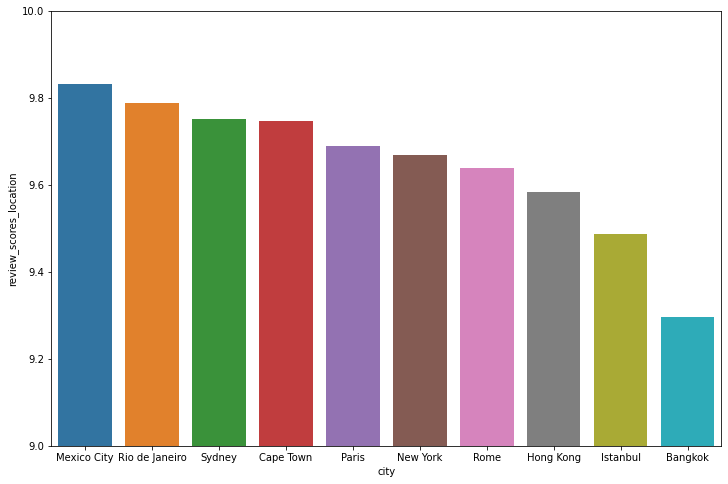

In [203]:
discard = ['Shared','room', 'Room', 'guesthouse', 'Farm stay', 'Boat', 'Entire floor', 'Camper/RV', 'Treehouse', 'Campsite', 'Cave', 'Train', 'Entire hostel', 'Tent', 'Yurt', 'Entire dorm', 'Bus', 'Entire in-law', 'Barn',
       'Hut', 'Lighthouse', 'Holiday park', 'Entire resort', 'Entire bed and breakfast', 'Entire home/apt', 'Entire guest suite', 'Tiny house', 'Entire bungalow', 'Pension', 'Castle', 'Casa particular', 'Dome house', 'Island', 'Earth house', 'Houseboat', 'Entire cabin', 'Entire chalet', 'Entire cottage' ]
ND2 = ND[~ND.property_type.str.contains('|'.join(discard))]

ND22 = ND2.pivot_table(values = 'review_scores_location', index = 'city', aggfunc=np.mean)
bestlocations = ND22.sort_values(('review_scores_location'), ascending=False)
bestlocations #Locations with best review scores - Bangkok has the lowest review scores but it's part of top 10
fig_dims = (12, 8) 
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=bestlocations.index, y="review_scores_location", data=bestlocations)
ax.set_ylim(9,10)

<AxesSubplot:xlabel='city', ylabel='host_id'>

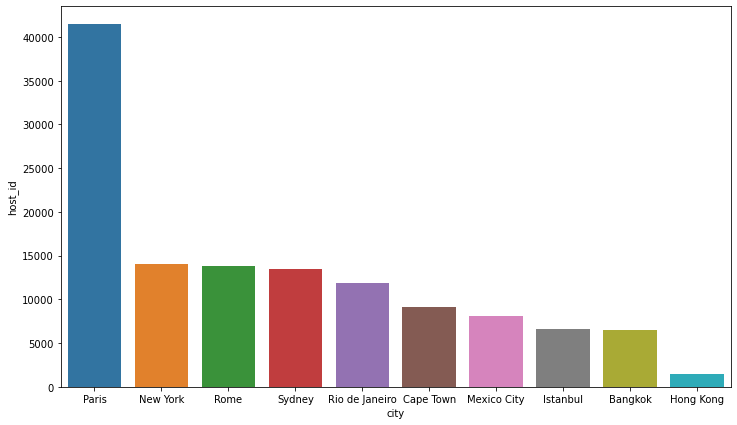

In [204]:
TL = ND2.groupby(['city']).agg({'host_id':['count']}).sort_index()
TL.columns = TL.columns.swaplevel(0,-1)
TL.sort_index(axis=1)
TL1 = TL.pivot_table(values = 'count', index = 'city')
hostpcity = TL1.sort_values(('host_id'), ascending=False) 
hostpcity
#hosts per city - Bangkok has very few hosts compared to other cities 
fig_dims = (12, 7) 
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=hostpcity.index, y="host_id", data=hostpcity)

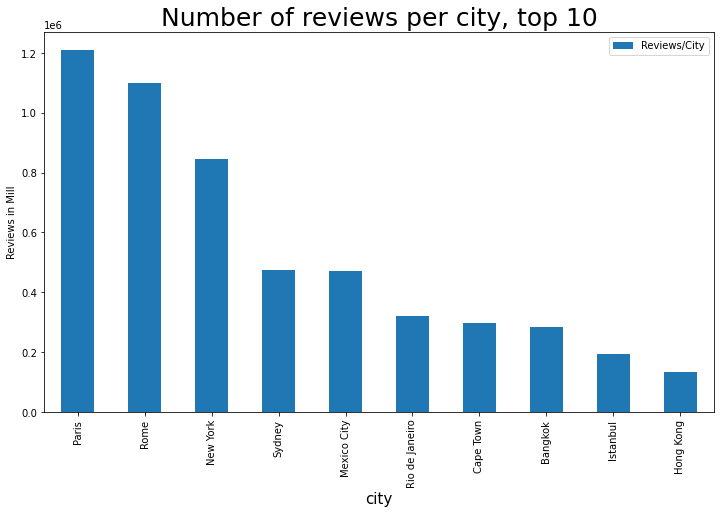

In [205]:
Airbnb.groupby(['city']).agg({'review_id':['count']}).sort_index()
#reviews per city - Bangkok has less reviews compared to other top cities
R = Airbnb.groupby('city')['review_id'].count().sort_values(ascending=False)
ax = R.plot.bar(figsize=fig_dims)
plt.title("Number of reviews per city, top 10", fontsize=25)
plt.xlabel('city', fontsize=15)
plt.ylabel("Reviews in Mill")
plt.show 
ax.legend(['Reviews/City'])

(9.0, 9.8)

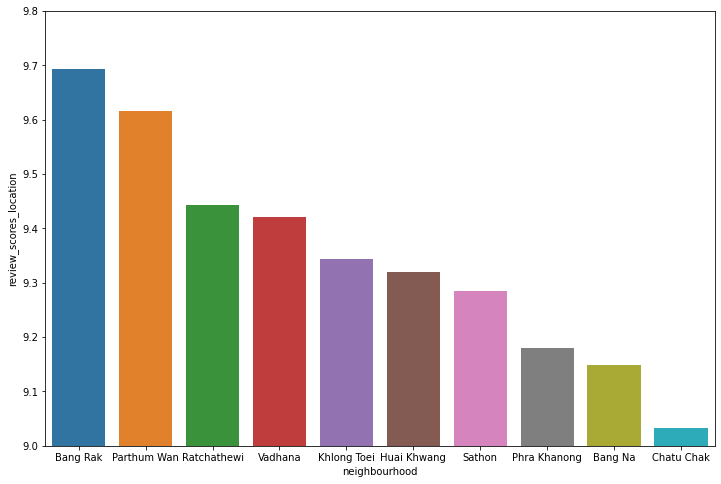

In [206]:
Bangkok = ND2.loc[(ND2['city']=='Bangkok')]
df1 = Bangkok.groupby(['neighbourhood'])['neighbourhood'].count().sort_values(ascending= False)
df1.head(15) #to find top 15 with the most properties

TopNbr = Bangkok.loc[Bangkok['neighbourhood'].isin(['Khlong Toei', 'Vadhana', 'Huai Khwang', 'Ratchathewi', 'Sathon', 'Phra Khanong', 'Bang Rak', 'Bang Na', 'Chatu Chak', 'Parthum Wan'])]
TScore = TopNbr.pivot_table(values = 'review_scores_location', index = 'neighbourhood', aggfunc=np.mean)
TS1 = TScore.sort_values(('review_scores_location'), ascending=False)
fig_dims = (12, 8) 
fig, ax5 = plt.subplots(figsize=fig_dims)
sns.barplot(x=TS1.index, y="review_scores_location", data=TS1)
ax5.set_ylim(9,9.8)

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

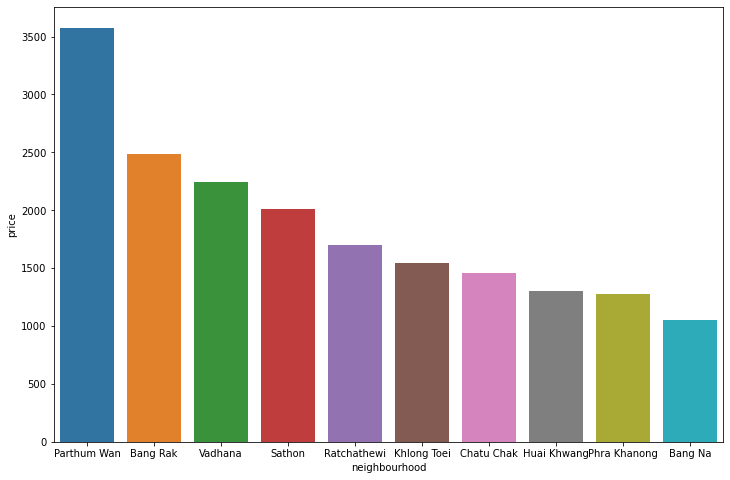

In [208]:
TPrice = TopNbr.pivot_table(values = 'price', index = 'neighbourhood', aggfunc=np.mean)
TP1 = TPrice.sort_values(('price'), ascending=False)
fig_dims = (12, 8) 
fig, ax6 = plt.subplots(figsize=fig_dims)
sns.barplot(x=TP1.index, y="price", data=TP1)

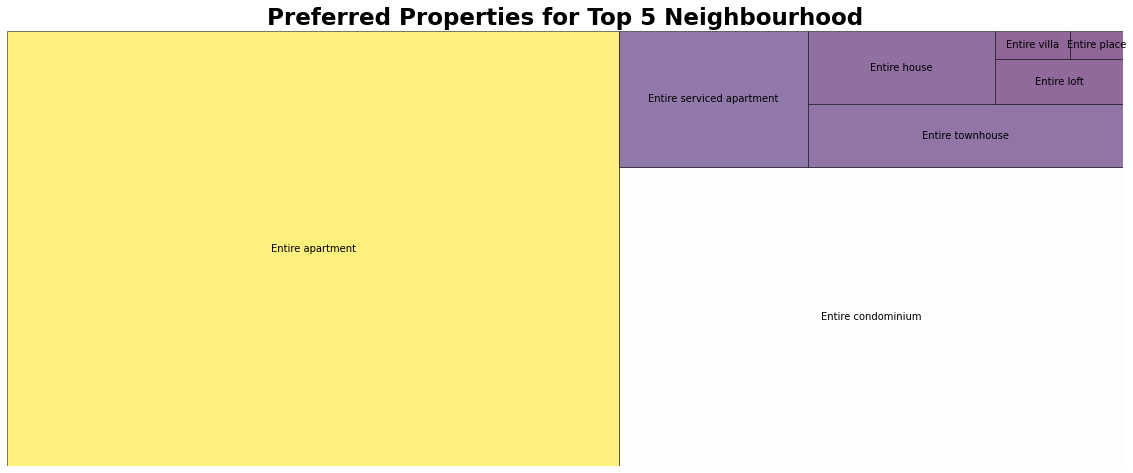

In [209]:
Top5Nbr = Bangkok.loc[Bangkok['neighbourhood'].isin(['Bang Rak', 'Vadhana', 'Parthum Wan', 'Ratchathewi', 'Sathon'])]
Prop = Top5Nbr['property_type'].value_counts().reset_index()
Prop1=Prop.set_index('index')
fig = plt.gcf()
ax4 = fig.add_subplot()
fig.set_size_inches(20, 8)
norm = matplotlib.colors.Normalize(vmin=min(Prop1.property_type), vmax=max(Prop1.property_type))
colors=[cmap(norm(value))for value in Prop1.property_type]
colors[1] = "#FBFCFE"
squarify.plot(label=Prop1.index,sizes=Prop.property_type, color = colors, alpha=.6,
             bar_kwargs=dict(linewidth=1, edgecolor="#222222"))
plt.title("Preferred Properties for Top 5 Neighbourhood",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

,accommodates
neighbourhood,
Bang Rak,3.86
Parthum Wan,4.80
Ratchathewi,3.70
Sathon,3.67
Vadhana,3.74


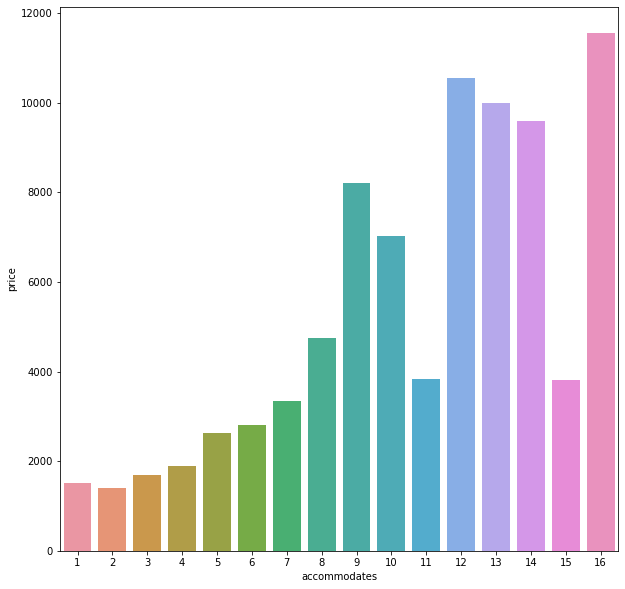

In [210]:
SCR = Top5Nbr.pivot_table(values = 'price', index = 'accommodates', aggfunc=np.mean)
SCR1 = SCR.sort_values(('price'), ascending=False)
fig_dims = (10, 10) 
fig, ax3 = plt.subplots(figsize=fig_dims)
sns.barplot(x=SCR1.index, y="price", data=SCR1)

Top5Nbr.pivot_table(values = 'accommodates', index = 'neighbourhood', aggfunc=np.mean)

In [211]:
R = Top5Nbr.groupby('property_type')['review_id'].count().sort_values(ascending=False).reset_index()
R

,property_type,review_id
0,Entire apartment,1251
1,Entire condominium,707
2,Entire serviced apartment,121
3,Entire townhouse,94
4,Entire house,64
5,Entire loft,27
6,Entire villa,10
7,Entire place,7


(0.0, 5.0)

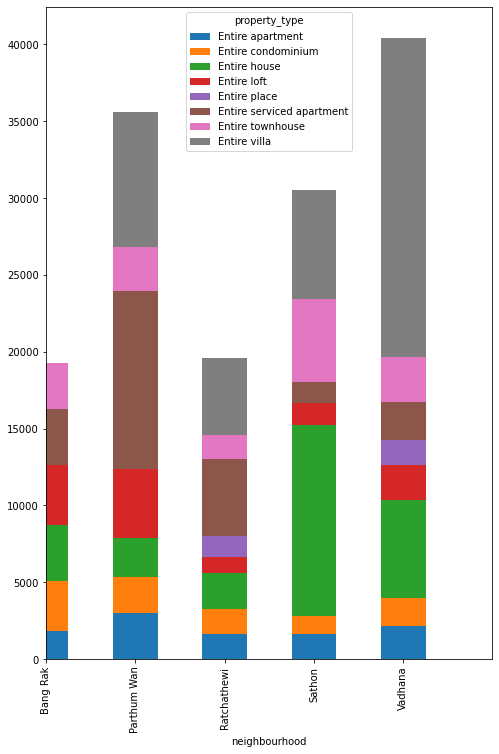

In [212]:
ax1 = Top5Nbr.groupby(['neighbourhood','property_type'])['price'].mean().unstack().plot(kind='bar', stacked = True, figsize=(8,12)) 
ax1.set_xlim(0,5)

<AxesSubplot:ylabel='neighbourhood'>

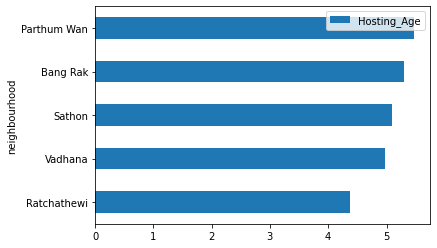

In [213]:
df_by_year=Top5Nbr.groupby(['neighbourhood','Host_Since_Year'])['host_id'].count().reset_index()
df_by_year1=Top5Nbr.groupby(['neighbourhood'])['Hosting_Age'].mean().reset_index()
HostingAge = df_by_year1.set_index('neighbourhood').sort_values(by='Hosting_Age') 
HostingAge.plot.barh()